In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing as fch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
housevalue = fch()
x = pd.DataFrame(housevalue.data)
y = housevalue.target

In [11]:
x.columns = housevalue.feature_names

In [12]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.3, random_state=420)

In [20]:
for i in [xtrain, xtest]:
    i.index = range(i.shape[0])

In [21]:
xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()
ss = ss.fit(xtrain)
xtrain = pd.DataFrame(ss.transform(xtrain))
xtrain.head()

,0,1,2,3,4,5,6,7
0,0.159626,0.510191,-0.400386,-0.137366,3.507724,0.020972,0.865304,-1.309257
1,0.761674,0.748787,0.330494,-0.018110,-0.886084,-0.031039,0.888745,-1.364222
2,-1.011288,-0.205595,0.132718,0.089427,-0.476078,-0.014029,0.180835,0.244749
3,-0.719778,-0.523722,-0.205669,-0.175459,-0.616297,-0.014731,1.376312,-0.869538
4,-0.025209,0.430659,-0.157760,-0.000031,-0.260426,-0.027203,-0.808364,0.609516


In [25]:
xtest = pd.DataFrame(ss.transform(xtest))
xtest.head()

,0,1,2,3,4,5,6,7
0,-1.104753,1.066914,-0.511652,-0.136703,0.136268,0.079532,-0.784923,0.644494
1,-1.229252,0.033001,-0.134304,-0.004412,-0.257763,0.000232,1.713859,-1.054420
2,0.158263,-1.159976,0.067546,-0.106206,1.238492,-0.018691,0.705907,-1.034433
3,-0.443104,1.862231,-0.103741,-0.025160,0.209040,-0.049979,1.005949,-1.459161
4,0.328629,0.589723,-0.195970,-0.235342,-0.107783,0.010500,-0.789611,0.739433


In [26]:
reg = LinearRegression().fit(xtrain, ytrain)
yhat = reg.predict(xtest)

In [31]:
yhat.max()

7.146198214270864

### 查看方程的系数

In [33]:
reg.coef_#w

array([ 8.34330242e-01,  1.28392315e-01, -2.71751685e-01,  3.07236193e-01,
        5.87759764e-04, -4.09677688e-02, -8.81149778e-01, -8.52966760e-01])

In [35]:
reg.intercept_#截距

2.0628276896456215

In [37]:
xtrain.columns = housevalue.feature_names
xtest.columns = housevalue.feature_names

In [38]:
[*zip(xtrain.columns, reg.coef_)]

[('MedInc', 0.8343302417471624),
 ('HouseAge', 0.1283923151295836),
 ('AveRooms', -0.2717516851919146),
 ('AveBedrms', 0.30723619279252656),
 ('Population', 0.000587759763746077),
 ('AveOccup', -0.04096776875874578),
 ('Latitude', -0.8811497776007545),
 ('Longitude', -0.8529667604566593)]

### 回归类模型评估指标

In [39]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat, ytest)

0.5309012639324571

In [42]:
(cross_val_score(reg, x, y, scoring="neg_mean_squared_error") * -1).mean()

0.5582901717686541

In [43]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS)

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [50]:
#衡量信息量
from sklearn.metrics import r2_score
r2_score(ytest, yhat)

0.6043668160178817

In [49]:
reg.score(xtest, ytest)

0.6043668160178817

In [51]:
cross_val_score(reg, x, y, scoring='r2', cv=10).mean()

0.5110068610524554

In [52]:
import matplotlib.pyplot as plt

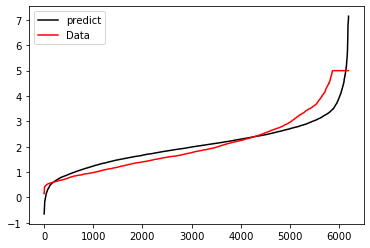

In [54]:
plt.plot(range(len(yhat)), sorted(yhat), c='black', label="predict")
plt.plot(range(len(ytest)), sorted(ytest), c="red", label="Data")
plt.legend()
plt.show()

## 岭回归 

In [55]:
from sklearn.linear_model import Ridge

In [57]:
#看之前线性模型在R^2上效果差，是否是因为多重共线性，采用岭回归来看其效果
X_ri = pd.DataFrame(housevalue.data)
Y_ri = housevalue.target
rtrain, rtest, itrain, itest = train_test_split(X_ri, Y_ri, test_size=.3, random_state=420)
for i in [rtrain, rtest]:
    i.index = range(i.shape[0])

In [59]:
ridge = Ridge(alpha=1).fit(rtrain, itrain)
ridge.score(rtest, itest)

0.6043610352312279

In [60]:
#可以看出来并非多重共线性带来的问题，因而可以调整alpha来调整效果

## 使用带交叉验证的岭回归 

In [62]:
from sklearn.linear_model import RidgeCV
import numpy as np

In [63]:
Ridge_  = RidgeCV(alphas=np.arange(1, 1001, 100)
                 ,store_cv_values=True).fit(X_ri, Y_ri)
Ridge_.score(X_ri, Y_ri)

0.6060251767338429

In [65]:
#所有交叉验证的分数
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369])

In [66]:
#最佳正则化系数
Ridge_.alpha_

101

## Lasso 

In [67]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso(alpha=0.01).fit(rtrain, itrain)
(lasso.coef_*100).tolist()

[40.10568371834486,
 1.093629260786014,
 -3.7423763610244514,
 26.52403783489719,
 0.0003525368511503932,
 -0.32071293948877994,
 -40.06483047344844,
 -40.81754399163315]

In [70]:
(Lasso(alpha=10).fit(rtrain, itrain).coef_*100).tolist()

[0.0, 0.0, 0.0, -0.0, -0.001528381504208746, -0.0, -0.0, -0.0]

In [71]:
#通过比较线性回归，岭回归和Lasso中参数coef_来看到Lasso对alpha取值敏感

## 选取Lasso最佳正则化参数 

In [72]:
from sklearn.linear_model import LassoCV

In [73]:
#默认评估指标为均方误差，而岭回归为R^2

#建立自己的α范围
alpharange = np.logspace(-10, -2, 200, base=10)
lasso_ = LassoCV(alphas=alpharange
                , cv=5
                ).fit(rtrain, itrain)

In [76]:
alpharange

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [75]:
lasso_.alpha_

0.0020729217795953697

In [78]:
#所有交叉验证结果
lasso_.mse_path_.mean(axis=1)

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [79]:
#最佳正则化参数下模型
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [80]:
lasso_.score(rtest, itest)

0.6038982670571438

In [82]:
#使用正则化路径长度和路径中个数建立α范围
ls_ = LassoCV(eps=0.00000001
             , n_alphas=300
             , cv=5).fit(rtrain, itrain)

In [83]:
ls_.alpha_

0.0020954551690628557

### 探究线性回归在非线性数据集上性能

In [84]:
from sklearn.tree import DecisionTreeRegressor

In [85]:
rnd = np.random.RandomState(420)
X = rnd.uniform(-3, 3, size=100)

Y = np.sin(X) + rnd.normal(size=len(X)) /3

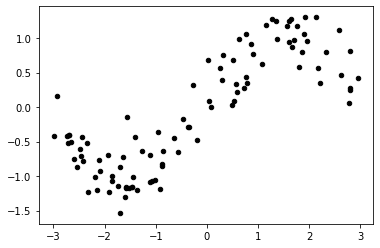

In [86]:
plt.scatter(X, Y, marker='o', c='k',s =20)
plt.show()

In [90]:
X = X.reshape(-1, 1)

In [91]:
LinearR = LinearRegression().fit(X, Y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, Y)

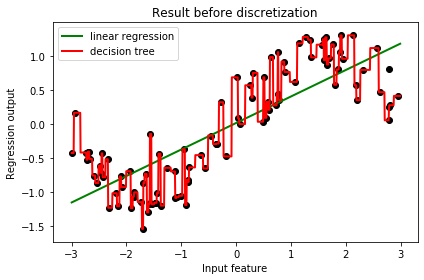

In [94]:
fig, ax1 = plt.subplots(1)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

ax1.plot(line, LinearR.predict(line), linewidth=2, color="green"
        , label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color="red"
        , label="decision tree")
ax1.scatter(X, Y, marker="o", c="k")
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

In [93]:
#使用画图时，fig, ax 生成画布需要和画图的命令在一个cell中

In [95]:
from sklearn.preprocessing import KBinsDiscretizer

In [124]:
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X_binned = enc.fit_transform(X)

In [125]:
#分出箱子的上下限
enc.bin_edges_

array([array([-2.98685668, -2.46870754, -1.91602852, -1.57097827, -1.08783097,
       -0.42034457,  0.37798216,  0.80548492,  1.61362927,  2.13261498,
        2.94996866])], dtype=object)

In [126]:
pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [127]:
LinearR_ = LinearRegression().fit(X_binned, Y)
line_binned = enc.fit_transform(line)

In [128]:
TreeR_ = DecisionTreeRegressor(random_state=42).fit(X_binned, Y)

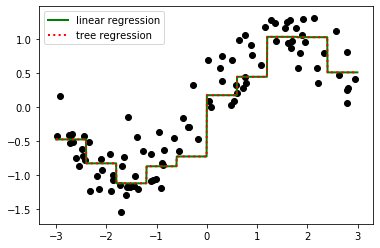

In [129]:
fig, ax = plt.subplots(1)

ax.plot(line, LinearR_.predict(line_binned)
        , linewidth=2, color="green", label="linear regression")
ax.plot(line, TreeR_.predict(line_binned)
       , linewidth=2, linestyle=":", color="red", label="tree regression")
ax.scatter(X, Y, marker="o", c="k")
plt.legend()
plt.show()


In [130]:
LinearR_.predict(line_binned).shape

(1000,)

In [131]:
LinearR_.score(line_binned, np.sin(line))

0.9011058479274296

## 多项式曲线 

In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [133]:
X = np.arange(1, 4).reshape(-1, 1)
#degree为多项式的次方
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

In [136]:
(X, X_)

(array([[1],
        [2],
        [3]]), array([[1., 1., 1.],
        [1., 2., 4.],
        [1., 3., 9.]]))

## 使用多项式回归拟合 

In [137]:
rnd = np.random.RandomState(42)
X = rnd.uniform(-3, 3, size=100)
Y = np.sin(X) + rnd.normal(size=len(X)) / 3
X = X.reshape(-1, 1)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [138]:
#原始数据集拟合
LinearR = LinearRegression().fit(X, Y)
LinearR.score(X, Y)

0.5361526059318595

In [143]:
X_ = PolynomialFeatures(degree=5).fit_transform(X)

In [151]:
poly = PolynomialFeatures(degree=5).fit(X)

In [153]:
poly.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']

In [145]:
LinearR_ = LinearRegression().fit(X_, Y)
LinearR_.score(X_, Y)

0.8561679370344799

In [146]:
#对测试集评价
LinearR.score(line, np.sin(line))

0.6800102369793312

In [147]:
line_ = PolynomialFeatures(degree=5).fit_transform(line)
LinearR_.score(line_, np.sin(line))

0.9868904451787978

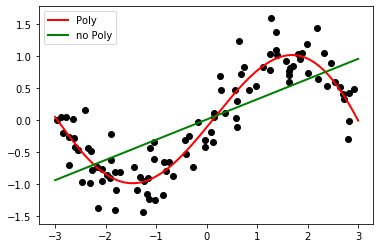

In [150]:
plt.plot(line, LinearR_.predict(line_), linewidth=2, color="red"
         , label="Poly")
plt.plot(line, LinearR.predict(line), linewidth=2, color="green"
        , label ="no Poly")
plt.scatter(X, Y, marker="o", c="k")
plt.legend()
plt.show()

### 在加利福尼亚房价的数据集上使用

In [155]:
x = pd.DataFrame(housevalue.data)
y = housevalue.target
x.columns = housevalue.feature_names

In [161]:
poly = PolynomialFeatures(degree=2).fit(x)

In [163]:
poly.get_feature_names(x.columns)

['1',
 'MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedInc^2',
 'MedInc HouseAge',
 'MedInc AveRooms',
 'MedInc AveBedrms',
 'MedInc Population',
 'MedInc AveOccup',
 'MedInc Latitude',
 'MedInc Longitude',
 'HouseAge^2',
 'HouseAge AveRooms',
 'HouseAge AveBedrms',
 'HouseAge Population',
 'HouseAge AveOccup',
 'HouseAge Latitude',
 'HouseAge Longitude',
 'AveRooms^2',
 'AveRooms AveBedrms',
 'AveRooms Population',
 'AveRooms AveOccup',
 'AveRooms Latitude',
 'AveRooms Longitude',
 'AveBedrms^2',
 'AveBedrms Population',
 'AveBedrms AveOccup',
 'AveBedrms Latitude',
 'AveBedrms Longitude',
 'Population^2',
 'Population AveOccup',
 'Population Latitude',
 'Population Longitude',
 'AveOccup^2',
 'AveOccup Latitude',
 'AveOccup Longitude',
 'Latitude^2',
 'Latitude Longitude',
 'Longitude^2']

In [164]:
x_ = poly.transform(x)
reg = LinearRegression().fit(x_, y)

In [165]:
coef = reg.coef_

In [166]:
[*zip(poly.get_feature_names(x.columns), coef)]

[('1', 5.919540543535431e-08),
 ('MedInc', -11.243025193047133),
 ('HouseAge', -0.8488985429774577),
 ('AveRooms', 6.441058979309905),
 ('AveBedrms', -31.591328783950864),
 ('Population', 0.0004060903437363997),
 ('AveOccup', 1.0038623386910916),
 ('Latitude', 8.705681884553798),
 ('Longitude', 5.880632723618107),
 ('MedInc^2', -0.031308127167766604),
 ('MedInc HouseAge', 0.0018599468180089292),
 ('MedInc AveRooms', 0.04330204675617813),
 ('MedInc AveBedrms', -0.18614227805444597),
 ('MedInc Population', 5.728315446833276e-05),
 ('MedInc AveOccup', -0.0025901950898045813),
 ('MedInc Latitude', -0.15250571255257905),
 ('MedInc Longitude', -0.1442429393710074),
 ('HouseAge^2', 0.00021172533628449324),
 ('HouseAge AveRooms', -0.0012621900986623286),
 ('HouseAge AveBedrms', 0.010611505610669234),
 ('HouseAge Population', 2.8188529325383913e-06),
 ('HouseAge AveOccup', -0.0018171694685867486),
 ('HouseAge Latitude', -0.01006903715603962),
 ('HouseAge Longitude', -0.00999950167106151),
 ('Av